In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Example of setting up an advanced grid layout of subplots.

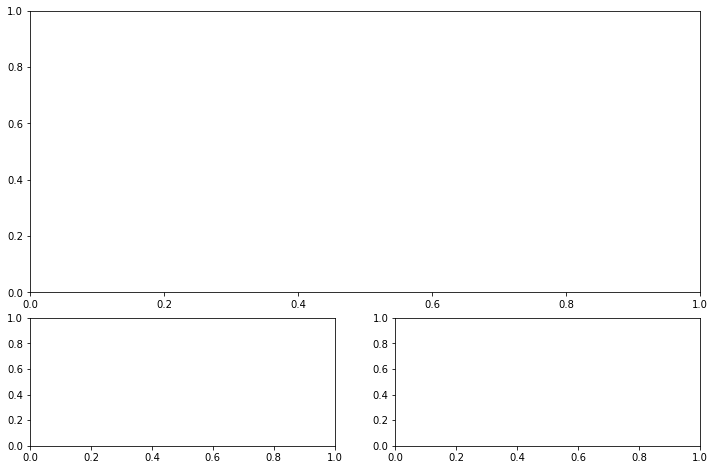

In [2]:
gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8)) #overall size of figure
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

Now we just need to fill in the ax1...ax3 with plots. 

#### Data in pandas DataFrame format

In [3]:
# generate some random data
x = np.random.randint(low=1, high=11, size=50) #generate 50 random integers between 1 and 10
y = x + np.random.randint(1, 5, size=x.size)  #generate 50 random integers between 1 and 4 and add to x
# putting our x and y arrays together as x,y pairs using column_stack and then converting to a pandas DataFrame
data = pd.DataFrame(zip(x,y), columns=['x data','y data'])  #zip creates an object of (x,y) pairs from our x,y series
data.head()

,x data,y data
0,1,5
1,8,9
2,1,5
3,10,12
4,6,8


#### Given data in a pandas DataFrame format let's generate some plots in a grid layout

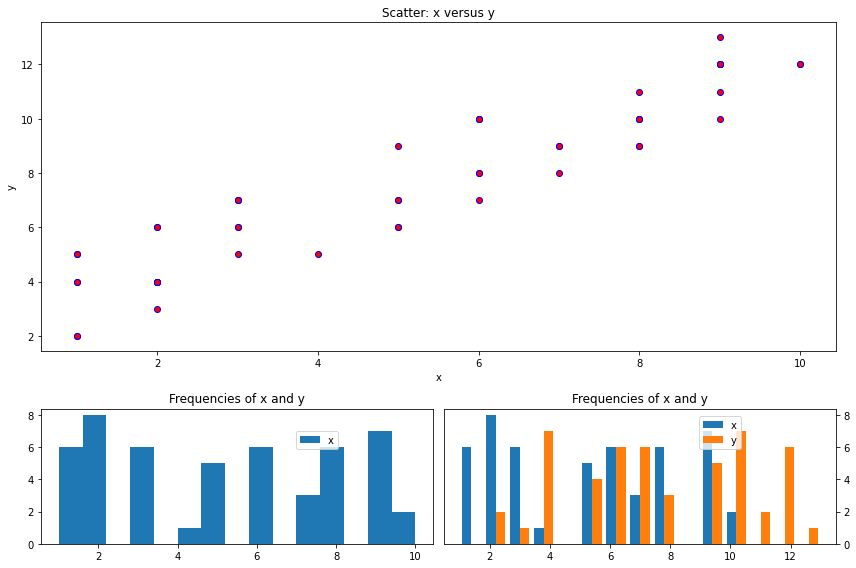

In [4]:
# using data above in pandas DataFrame format

# setup layout of subplots ax1, ax2, ax3
gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8)) #overall size of figure
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

# Now fill subplots

# ax1 scatter plot
ax1.scatter(x=data.loc[:,'x data'], y=data.loc[:,'y data'], marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter: x versus y')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# ax2 histogram
ax2.hist(data.loc[:,'x data'],bins=15,label=('x', 'y'))
ax2.legend(loc=(0.65, 0.7))
ax2.set_title('Frequencies of x and y')
ax2.yaxis.tick_left()

# ax3 multiple histograms on one plot
ax3.hist([data.loc[:,'x data'],data.loc[:,'y data']],bins=15,label=('x', 'y'))
ax3.legend(loc=(0.65, 0.7))
ax3.set_title('Frequencies of x and y')
ax3.yaxis.tick_right()

fig.tight_layout()

### Let's look at reading data into a pandas DataFrame format and manipulating that data using groupby

In [2]:
path = 'titanic.csv'
raw=pd.read_csv(path)
raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# taking a subset of the data.  We could now make simple scatter plots of one column vs another as shown previously
data=raw.loc[:,['Survived', 'Pclass','Sex','Age','Fare']]
data.head(8)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
5,0,3,male,NaN,8.4583
6,0,1,male,54.0,51.8625
7,0,3,male,2.0,21.0750


What is the average ticket price paid by those that died vs survived?

In [ ]:
data.groupby('Survived').mean()

What is the average age of male & female passengers in 3rd class? 

In [6]:
data.groupby(['Sex','Pclass']).mean().unstack().loc[:,'Age']

Pclass,1,2,3
Sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


What is the average age of male passengers in 3rd class that died vs survived? 

In [9]:
data.groupby(['Sex','Pclass','Survived']).mean().unstack().unstack().loc[:,'Age']

Survived          0                                1                      
Pclass            1          2          3          1          2          3
Sex                                                                       
female    25.666667  36.000000  23.818182  34.939024  28.080882  19.329787
male      44.581967  33.369048  27.255814  36.248000  16.022000  22.274211

In [10]:
data.groupby(['Sex','Survived','Pclass']).mean().unstack().unstack().loc[:,'Age']

Pclass            1                     2                     3           
Survived          0          1          0          1          0          1
Sex                                                                       
female    25.666667  34.939024  36.000000  28.080882  23.818182  19.329787
male      44.581967  36.248000  33.369048  16.022000  27.255814  22.274211

In [33]:
data.groupby(['Pclass','Survived','Sex']).mean().unstack().unstack().loc[:,'Age']

Sex          female                  male           
Survived          0          1          0          1
Pclass                                              
1         25.666667  34.939024  44.581967  36.248000
2         36.000000  28.080882  33.369048  16.022000
3         23.818182  19.329787  27.255814  22.274211

In [19]:
data.groupby(['Pclass','Survived','Sex']).mean().unstack().unstack().loc[:,'Age'].loc[:,'male'].loc[3]

Survived
0    27.255814
1    22.274211
Name: 3, dtype: float64

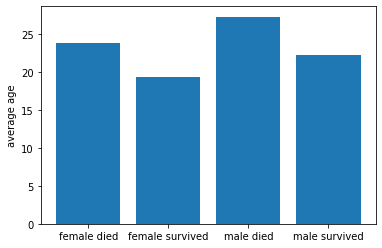

In [35]:
dataforbar=data.groupby(['Pclass','Survived','Sex']).mean().unstack().unstack().loc[:,'Age'].loc[3]

#, where the slices will be ordered and plotted counter-clockwise:
labels = ['female died','female survived', 'male died', 'male survived']

fig1, ax1 = plt.subplots()
ax1.bar(x=labels, height=dataforbar)
ax1.set_ylabel('average age')

plt.show()

### .groupby one column returns another DataFrame

In [175]:
data_age=data.groupby(['Age']).count() # .counts number of records for each column by Age
data_age

,Survived,Pclass,Sex,Fare
Age,,,,
0.42,1,1,1,1
0.67,1,1,1,1
0.75,2,2,2,2
0.83,2,2,2,2
0.92,1,1,1,1
...,...,...,...,...
70.00,2,2,2,2
70.50,1,1,1,1
71.00,2,2,2,2


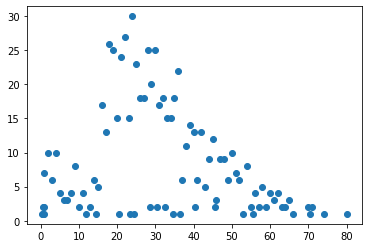

In [181]:
# scatter plot of number of Fares (people) versus age from groupby data
plt.plot(data_age.loc[:,'Fare'], 'o');

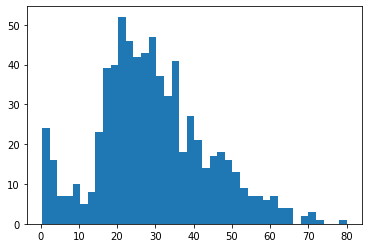

In [185]:
# histogram plotted directly from Age data (not groupby)
plt.hist(data.loc[:,'Age'], bins=40);

### Groupby 2 columns returns a multilevel indexed DataFrame
#### We need to "unstack" this data so we have a single index for the rows

In [187]:
data_age_sex=data.groupby(['Age','Sex']).count()
data_age_sex

,,Survived,Pclass,Fare
Age,Sex,,,
0.42,male,1,1,1
0.67,male,1,1,1
0.75,female,2,2,2
0.83,male,2,2,2
0.92,male,1,1,1
...,...,...,...,...
70.00,male,2,2,2
70.50,male,1,1,1
71.00,male,2,2,2


In [191]:
d_a_s_unstack=data_age_sex.unstack()

In [192]:
# now we can access the Fare data and we have a dataframe of the number of females and males by age
d_a_s_unstack.loc[:,'Fare']

Sex,female,male
Age,,
0.42,NaN,1.0
0.67,NaN,1.0
0.75,2.0,NaN
0.83,NaN,2.0
0.92,NaN,1.0
...,...,...
70.00,NaN,2.0
70.50,NaN,1.0
71.00,NaN,2.0


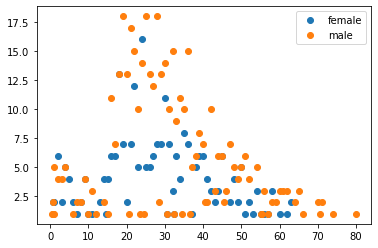

In [216]:
tt=d_a_s_unstack.loc[:,'Fare']
plt.plot(tt.loc[:,'female'], 'o',label='female')
plt.plot(tt.loc[:,'male'], 'o', label='male')
plt.legend();

## Grouby three columns returns a multilevel pandas DataFrame
### Need to unstack twice

In [218]:
data_age_sex_survived=data.groupby(['Age','Sex','Survived']).count()
data_age_sex_survived.head()

,,,Pclass,Fare
Age,Sex,Survived,,
0.42,male,1,1,1
0.67,male,1,1,1
0.75,female,1,2,2
0.83,male,1,2,2
0.92,male,1,1,1


In [222]:
data_age_sex_survived_unstacktwice=tt.unstack().unstack()
data_age_sex_survived_unstacktwice

Pclass                    Fare                 
Survived      0           1           0           1     
Sex      female male female male female male female male
Age                                                     
0.42        NaN  NaN    NaN  1.0    NaN  NaN    NaN  1.0
0.67        NaN  NaN    NaN  1.0    NaN  NaN    NaN  1.0
0.75        NaN  NaN    2.0  NaN    NaN  NaN    2.0  NaN
0.83        NaN  NaN    NaN  2.0    NaN  NaN    NaN  2.0
0.92        NaN  NaN    NaN  1.0    NaN  NaN    NaN  1.0
...         ...  ...    ...  ...    ...  ...    ...  ...
70.00       NaN  2.0    NaN  NaN    NaN  2.0    NaN  NaN
70.50       NaN  1.0    NaN  NaN    NaN  1.0    NaN  NaN
71.00       NaN  2.0    NaN  NaN    NaN  2.0    NaN  NaN
74.00       NaN  1.0    NaN  NaN    NaN  1.0    NaN  NaN
80.00       NaN  NaN    NaN  1.0    NaN  NaN    NaN  1.0

[88 rows x 8 columns]

In [224]:
# take the fare data 
data_age_sex_survived_unstacktwice.loc[:,'Fare']

Survived      0           1     
Sex      female male female male
Age                             
0.42        NaN  NaN    NaN  1.0
0.67        NaN  NaN    NaN  1.0
0.75        NaN  NaN    2.0  NaN
0.83        NaN  NaN    NaN  2.0
0.92        NaN  NaN    NaN  1.0
...         ...  ...    ...  ...
70.00       NaN  2.0    NaN  NaN
70.50       NaN  1.0    NaN  NaN
71.00       NaN  2.0    NaN  NaN
74.00       NaN  1.0    NaN  NaN
80.00       NaN  NaN    NaN  1.0

[88 rows x 4 columns]

In [225]:
# now we have data for male and female that died (0) and male and female that lived (1)
# here would be the data for the male and females that died

data_age_sex_survived_unstacktwice.loc[:,'Fare'][0]

Sex,female,male
Age,,
0.42,NaN,NaN
0.67,NaN,NaN
0.75,NaN,NaN
0.83,NaN,NaN
0.92,NaN,NaN
...,...,...
70.00,NaN,2.0
70.50,NaN,1.0
71.00,NaN,2.0


### Here are some other interesting ways of looking at the data

### This looks at the mean Fare price or mean Age of females and males that died or survived

In [239]:
data.groupby(['Sex','Survived']).mean().unstack()  # notice we used mean() here rather than count()

Pclass                  Age                  Fare           
Survived         0         1          0          1          0          1
Sex                                                                     
female    2.851852  1.918455  25.046875  28.847716  23.024385  51.938573
male      2.476496  2.018349  31.618056  27.276022  21.960993  40.821484

In [232]:
data.groupby(['Sex','Pclass','Survived']).count().unstack().unstack()['Fare']

Survived   0            1        
Pclass     1   2    3   1   2   3
Sex                              
female     3   6   72  91  70  72
male      77  91  300  45  17  47

In [234]:
data.groupby(['Fare','Sex','Survived']).count().unstack().unstack()['Pclass']

Survived      0            1     
Sex      female  male female male
Fare                             
0.0000      NaN  14.0    NaN  1.0
4.0125      NaN   1.0    NaN  NaN
5.0000      NaN   1.0    NaN  NaN
6.2375      NaN   1.0    NaN  NaN
6.4375      NaN   1.0    NaN  NaN
...         ...   ...    ...  ...
227.5250    NaN   1.0    3.0  NaN
247.5208    NaN   1.0    1.0  NaN
262.3750    NaN   NaN    2.0  NaN
263.0000    NaN   2.0    2.0  NaN
512.3292    NaN   NaN    1.0  2.0

[248 rows x 4 columns]

Example pie chart

In [20]:
data.groupby(['Sex','Pclass','Survived']).count().unstack().unstack()['Fare'].loc[:,1].loc['female']

Pclass
1    91
2    70
3    72
Name: female, dtype: int64

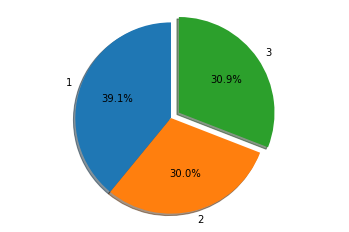

In [248]:
dataforpie=data.groupby(['Sex','Pclass','Survived']).count().unstack().unstack()['Fare'].loc[:,1].loc['female']

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '1','2','3'
sizes = dataforpie
explode = (0, 0, 0.1)  # only "explode" the 3rd slice i.e. 3rd class tickets

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()